# Data Pre-processing of Melanoma/Not Melanoma Images

About the Dataset:

The original data is the HAM10k images dataset, Human Against Machine with 10,000 Training Images, which is freely available.

The dermoscopic images in the HAM10k dataset have been curated and normalized in terms of luminosity, colors, resolution, etc. The actual diagnosis was validated by histopathology (a.k.a. source of truth) in more than 50 percent of the cases, which is twice more than the previously available skin lesion datasets. The rest of the lesions’ diagnosis was based on a consensus of dermatologists.

The task is to diagnose Melanoma vs. Not Melanoma.

Important Note:

The initial dataset was highly imbalanced with 1,113 Melanoma and
8,902 Not Melanoma images. Data augmentation was however performed which resulted in fairly similar numbers of Melanoma and Not Melanoma images across all test, train and validation datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Collab/DermMel')

# Importing libraries


In [25]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from PIL import Image

In [4]:
# Create empty lists with the filepaths for testing, training and validating

test_dir = Path('/content/drive/MyDrive/Collab/DermMel/')
test_filepaths=list(test_dir.glob("test/*/*"))
#test_filepaths = list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.jpeg')) + list(test_dir.glob(r'**/*.png'))

train_dir = Path('/content/drive/MyDrive/Collab/DermMel/')
train_filepaths=list(train_dir.glob("train_sep/*/*"))
# train_filepaths = list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.jpeg')) + list(train_dir.glob(r'**/*.png'))


val_dir = Path('/content/drive/MyDrive/Collab/DermMel/')
val_filepaths=list(val_dir.glob("valid/*/*"))
#val_filepaths = list(val_dir.glob(r'**/*.jpg')) + list(val_dir.glob(r'**/*.jpeg')) + list(val_dir.glob(r'**/*.png'))



In [7]:
len(val_filepaths)


3561

In [8]:
len(test_filepaths)

3561

In [9]:
len(train_filepaths)

10682

In [11]:
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]


    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df


In [13]:
train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

['Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Me

In [14]:
train_df

,Filepath,Label
0,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
1,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
2,/content/drive/MyDrive/Collab/DermMel/train_se...,NotMelanoma
3,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
4,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
...,...,...
10677,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
10678,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
10679,/content/drive/MyDrive/Collab/DermMel/train_se...,NotMelanoma
10680,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma


In [15]:
test_df

,Filepath,Label
0,/content/drive/MyDrive/Collab/DermMel/test/Mel...,Melanoma
1,/content/drive/MyDrive/Collab/DermMel/test/Not...,NotMelanoma
2,/content/drive/MyDrive/Collab/DermMel/test/Mel...,Melanoma
3,/content/drive/MyDrive/Collab/DermMel/test/Mel...,Melanoma
4,/content/drive/MyDrive/Collab/DermMel/test/Mel...,Melanoma
...,...,...
3556,/content/drive/MyDrive/Collab/DermMel/test/Not...,NotMelanoma
3557,/content/drive/MyDrive/Collab/DermMel/test/Mel...,Melanoma
3558,/content/drive/MyDrive/Collab/DermMel/test/Not...,NotMelanoma
3559,/content/drive/MyDrive/Collab/DermMel/test/Mel...,Melanoma


In [16]:
val_df

,Filepath,Label
0,/content/drive/MyDrive/Collab/DermMel/valid/No...,NotMelanoma
1,/content/drive/MyDrive/Collab/DermMel/valid/No...,NotMelanoma
2,/content/drive/MyDrive/Collab/DermMel/valid/Me...,Melanoma
3,/content/drive/MyDrive/Collab/DermMel/valid/Me...,Melanoma
4,/content/drive/MyDrive/Collab/DermMel/valid/No...,NotMelanoma
...,...,...
3557,/content/drive/MyDrive/Collab/DermMel/valid/No...,NotMelanoma
3558,/content/drive/MyDrive/Collab/DermMel/valid/Me...,Melanoma
3559,/content/drive/MyDrive/Collab/DermMel/valid/Me...,Melanoma
3560,/content/drive/MyDrive/Collab/DermMel/valid/No...,NotMelanoma


In [17]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 10682

Number of different labels: 2

Labels: ['Melanoma' 'NotMelanoma']


In [20]:
print('-- Testing set --\n')
print(f'Number of pictures: {test_df.shape[0]}\n')
print(f'Number of different labels: {len(test_df.Label.unique())}\n')
print(f'Labels: {test_df.Label.unique()}')

-- Testing set --

Number of pictures: 3561

Number of different labels: 2

Labels: ['Melanoma' 'NotMelanoma']


In [21]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
1,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
2,/content/drive/MyDrive/Collab/DermMel/train_se...,NotMelanoma
3,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma
4,/content/drive/MyDrive/Collab/DermMel/train_se...,Melanoma


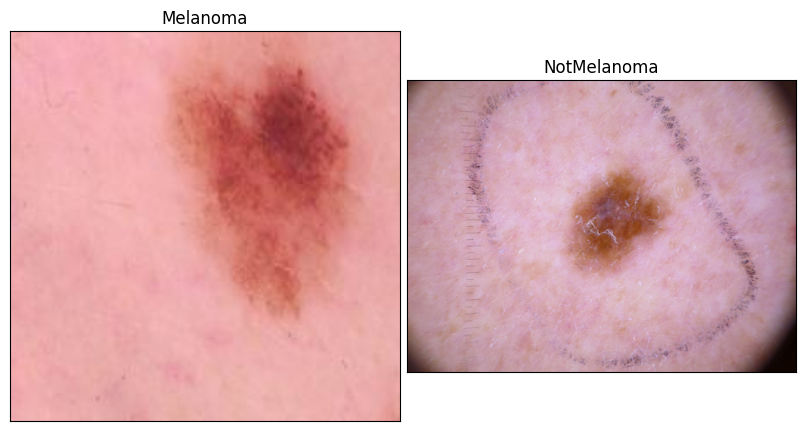

In [24]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
# Resizing and Normalizing images using a LOOP

# /Melanoma/test

test_imgs=[]
for filename_test in test_filepaths:
  img = cv2.imread(str(filename_test))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  img = cv2.resize(img, (224, 224)) #Resize to 224x224 to match model input size
  img = img / 255.0 # Normalize pixel values to [0, 1]
  img = np.expand_dims(img, axis=0)  # Add batch dimension
  test_imgs.append(img)


# /Melanoma/train
train_imgs=[]
for filename_tr in train_filepaths:
  img_tr = cv2.imread(str(filename_tr))
  img_tr = cv2.cvtColor(img_tr, cv2.COLOR_BGR2RGB) # Convert to RGB
  img_tr = cv2.resize(img_tr, (224, 224)) #Resize to 224x224 to match model input size
  img_tr = img_tr / 255.0 # Normalize pixel values to [0, 1]
  img_tr = np.expand_dims(img_tr, axis=0)  # Add batch dimension
  train_imgs.append(img_tr)


# /Melanoma/valid

val_imgs=[]
for filename_val in val_filepaths
  img_val = cv2.imread(str(filename_val))
  img_val = cv2.cvtColor(img_val, cv2.COLOR_BGR2RGB) # Convert to RGB
  img_val = cv2.resize(img_val, (224, 224)) #Resize to 224x224 to match model input size
  img_val = img_tr / 255.0 # Normalize pixel values to [0, 1]
  img_val = np.expand_dims(img_val, axis=0)  # Add batch dimension
  val_imgs.append(img_val)


KeyboardInterrupt: 